In [1]:
from feature_selector import FeatureSelector
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/gene_prot_data.csv')

In [3]:
train = pd.read_csv('data/gene_prot_data.csv')
train_labels = train['Diagnosis']
train = train.drop(columns = ['Diagnosis','Subject_ID'])

In [4]:
fs = FeatureSelector(data = train, labels = train_labels)

### Remove Multi-colinear Features

In [5]:
fs.identify_collinear(correlation_threshold=0.975)

213 features with a correlation magnitude greater than 0.97.



In [6]:
correlated_features = fs.ops['collinear']
correlated_features[:10]

['P02775',
 'P63000',
 'P25098',
 'P08631',
 'Q9UHD2',
 'Q9Y3C8',
 'P02751.1',
 'P07948.1',
 'P62937',
 'P40925']

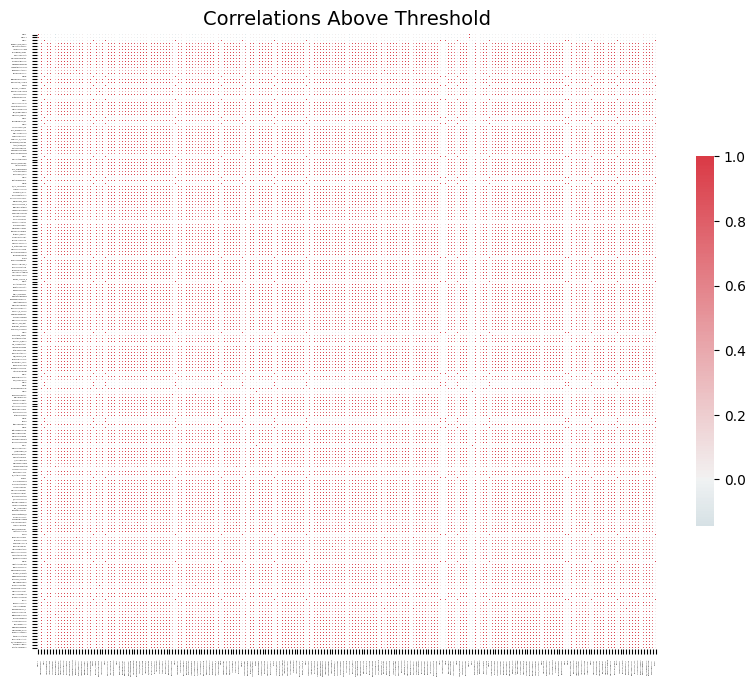

In [7]:
fs.plot_collinear()

In [8]:
fs.record_collinear

drop_feature        corr_feature  corr_value
0                P02775              P02776    0.983064
1                P63000              P07900    0.986556
2                P25098              P63000    0.981752
3                P08631              P04150    0.989754
4                Q9UHD2              P04150    0.989650
..                  ...                 ...         ...
337  xnrnj5EYbo1TYnr7fc  uQbXq1wt7p2zZQnYAo    0.981533
338  xnrnj5EYbo1TYnr7fc  uvnNqhxDpRtrervC50    0.975472
339  xnrnj5EYbo1TYnr7fc  xjeW0eq6QTXq1wt7p0    0.983964
340  xoleNeUeR1JWphIuIU  BADyUpuum7l7DVJB0o    0.975032
341  xoleNeUeR1JWphIuIU  NCtOUeR1JenhLiHe3Q    0.976962

[342 rows x 3 columns]

### Zero Important Features

In [9]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'accuracy', n_iterations = 10)

Training Gradient Boosting Model

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1056730
[LightGBM] [Info] Number of data points in the train set: 517, number of used features: 6242
[LightGBM] [Info] Start training from score -0.734614
[LightGBM] [Info] Start training from score -1.292216
[LightGBM] [Info] Start training from score -1.403856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [10]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 6242 original features
There are 0 one-hot features


In [11]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[:5]

['r76edR7XUflxKKAJCM',
 'HXyt34Sg3ldISUofq0',
 'okUYUFM6QOBQlS__S4',
 'rC.3F6nhvl_1oqn5Ks',
 'B.7mrn_C5fk0qPKJDw']

In [12]:
#drop the zero importance features
train_no_collinear_no_zero_importance = fs.remove(methods = ['zero_importance', 'collinear'])

Removed 2350 features.


In [13]:
train_no_collinear_no_zero_importance

Age      MMSE  Sex     PC1      PC2      PC3     PC4     PC5  \
0    75.000000  0.746982    0  0.0088   0.0276   0.0132  0.0005 -0.0114   
1    88.000000  0.746982    0  0.0114   0.0284   0.0192 -0.0095 -0.0222   
2    75.461386  0.746982    0  0.0097  28.0000  13.0000 -0.0234  0.0033   
3    75.461386  0.746982    1  0.0076  28.0000   9.0000 -0.0011 -0.0028   
4    75.461386  0.746982    1  0.0097   0.0244  18.0000 -0.0043  0.0012   
..         ...       ...  ...     ...      ...      ...     ...     ...   
512  67.000000  0.818182    1  0.0073  -0.0539   0.0073  0.0216  0.0011   
513  80.000000  0.909091    0  0.0135  -0.0574  -0.0044 -2.0000  0.0141   
514  80.000000  0.636364    0  0.0135  -0.0574  -0.0044 -2.0000  0.0141   
515  76.000000  0.954545    0  0.0011  -0.0498   0.0126  0.0303  0.0014   
516  77.000000  0.772727    0  0.0011  -0.0498   0.0126  0.0303  0.0014   

        PC6      PC7  ...  xsHVVKxjKh4M6FeeAk  xt5JSXnYB.LaXjp8ig  \
0    0.0061  17.0000  ...            0.126412            0.424718   
1   -0.0311   0.0094  ...            0.126440            0.343256   
2    0.0124   0.0049  ...            0.115542            0.070830   
3   -0.0036   0.0269  ...            0.538409            0.345144   
4   -0.0111   0.0000  ...            0.238038            0.225879   
..      ...      ...  ...                 ...                 ...   
512  0.0046   0.0099  ...            0.290826            0.573561   
513 -0.0033  -0.0299  ...            0.528547            0.565146   
514 -0.0033  -0.0299  ...            0.528547            0.565146   
515 -4.0000 -12.0000  ...            0.447214            0.648720   
516 -4.0000 -12.0000  ...            0.447214            0.648720   

     xu.S6OENiSSCDruXFc  xu3n8ix_RpCpNPRKhc  xuBm5ckgidWRNTl.gQ  \
0              0.010746            0.424735            0.398869   
1              0.239652            0.297554            0.341023   
2              0.058596            0.438859            0.216219   
3              0.287620            0.579192            0.211476   
4              0.316210            0.422101            0.247895   
..                  ...                 ...                 ...   
512            0.589071            0.961699            0.622341   
513            0.663432            0.933129            0.629757   
514            0.663432            0.933129            0.629757   
515            0.659313            0.911345            0.773895   
516            0.659313            0.911345            0.773895   

     xuNOUeR1JerhIuIV7c  xud4v2r3nXECBua55o  xve7nuGHtAizelOmhE  \
0              0.066384            0.321479            0.095191   
1              0.071577            0.429470            0.268920   
2              0.599177            0.179004            0.098406   
3              0.200429            0.001667            0.263119   
4              0.154150            0.334002            0.304057   
..                  ...                 ...                 ...   
512            0.796417            0.776029            0.585026   
513            0.826243            0.851986            0.710167   
514            0.826243            0.851986            0.710167   
515            0.843128            0.824156            0.709999   
516            0.843128            0.824156            0.709999   

     xws9e3UChad1OnXmXY  xz1S1tKD.sgqfTuesU  
0              0.253679            0.000000  
1              0.277040            0.361951  
2              0.141998            0.263429  
3              0.221761            0.162624  
4              0.165162            0.385041  
..                  ...                 ...  
512            0.803298            0.525950  
513            0.774187            0.639621  
514            0.774187            0.639621  
515            0.855688            0.716505  
516            0.855688            0.716505  

[517 rows x 3892 columns]

### Feature Importance

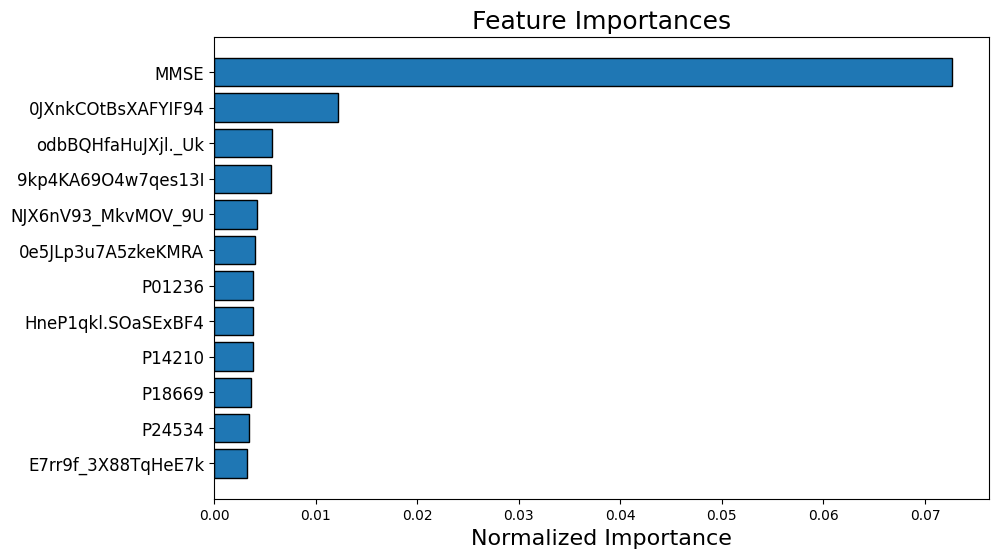

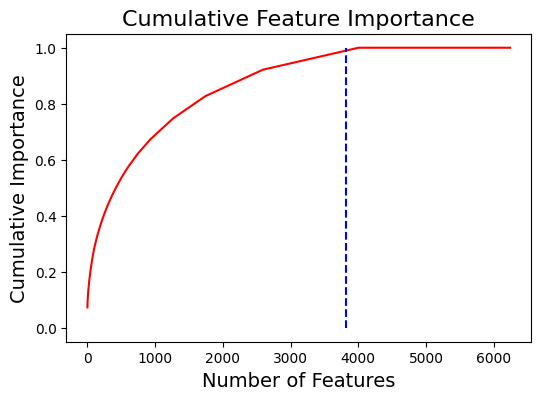

3819 features required for 0.99 of cumulative importance


In [14]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [15]:
fs.feature_importances.head(10)

feature  importance  normalized_importance  \
0                MMSE      1301.0               0.072657   
1  0JXnkCOtBsXAFYIF94       219.0               0.012231   
2  odbBQHfaHuJXjl._Uk       103.0               0.005752   
3  9kp4KA69O4w7qes13I       100.0               0.005585   
4  NJX6nV93_MkvMOV_9U        75.0               0.004189   
5  0e5JLp3u7A5zkeKMRA        72.0               0.004021   
6              P01236        69.0               0.003853   
7  HneP1qkl.SOaSExBF4        69.0               0.003853   
8              P14210        68.0               0.003798   
9              P18669        65.0               0.003630   

   cumulative_importance  
0               0.072657  
1               0.084888  
2               0.090640  
3               0.096225  
4               0.100413  
5               0.104434  
6               0.108288  
7               0.112141  
8               0.115939  
9               0.119569

In [16]:
fs.identify_low_importance(cumulative_importance = 0.99)

3818 features required for cumulative importance of 0.99 after one hot encoding.
2424 features do not contribute to cumulative importance of 0.99.



In [17]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['Bl.8pRLheZDvzOf4XE',
 'NjumNKoy4L8UHq47S0',
 'KeeRO8i1Vi3dZ1Cujg',
 'QygSIVl8Ih6NkRf5BI',
 '9o1f3eDoiPiKjtqS9U']

In [18]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 2524 features including one-hot features.


In [20]:
train_removed_all['Subject_ID'] = data['Subject_ID']
train_removed_all['Diagnosis'] = train_labels

In [21]:
train_removed_all.to_csv('data/gene_prot_subset.csv', index = False)

In [22]:
train_removed_all

Age      MMSE  Sex     PC1      PC2      PC3     PC4     PC5  \
0    75.000000  0.746982    0  0.0088   0.0276   0.0132  0.0005 -0.0114   
1    88.000000  0.746982    0  0.0114   0.0284   0.0192 -0.0095 -0.0222   
2    75.461386  0.746982    0  0.0097  28.0000  13.0000 -0.0234  0.0033   
3    75.461386  0.746982    1  0.0076  28.0000   9.0000 -0.0011 -0.0028   
4    75.461386  0.746982    1  0.0097   0.0244  18.0000 -0.0043  0.0012   
..         ...       ...  ...     ...      ...      ...     ...     ...   
512  67.000000  0.818182    1  0.0073  -0.0539   0.0073  0.0216  0.0011   
513  80.000000  0.909091    0  0.0135  -0.0574  -0.0044 -2.0000  0.0141   
514  80.000000  0.636364    0  0.0135  -0.0574  -0.0044 -2.0000  0.0141   
515  76.000000  0.954545    0  0.0011  -0.0498   0.0126  0.0303  0.0014   
516  77.000000  0.772727    0  0.0011  -0.0498   0.0126  0.0303  0.0014   

        PC6      PC7  ...  xu.S6OENiSSCDruXFc  xu3n8ix_RpCpNPRKhc  \
0    0.0061  17.0000  ...            0.010746            0.424735   
1   -0.0311   0.0094  ...            0.239652            0.297554   
2    0.0124   0.0049  ...            0.058596            0.438859   
3   -0.0036   0.0269  ...            0.287620            0.579192   
4   -0.0111   0.0000  ...            0.316210            0.422101   
..      ...      ...  ...                 ...                 ...   
512  0.0046   0.0099  ...            0.589071            0.961699   
513 -0.0033  -0.0299  ...            0.663432            0.933129   
514 -0.0033  -0.0299  ...            0.663432            0.933129   
515 -4.0000 -12.0000  ...            0.659313            0.911345   
516 -4.0000 -12.0000  ...            0.659313            0.911345   

     xuBm5ckgidWRNTl.gQ  xuNOUeR1JerhIuIV7c  xud4v2r3nXECBua55o  \
0              0.398869            0.066384            0.321479   
1              0.341023            0.071577            0.429470   
2              0.216219            0.599177            0.179004   
3              0.211476            0.200429            0.001667   
4              0.247895            0.154150            0.334002   
..                  ...                 ...                 ...   
512            0.622341            0.796417            0.776029   
513            0.629757            0.826243            0.851986   
514            0.629757            0.826243            0.851986   
515            0.773895            0.843128            0.824156   
516            0.773895            0.843128            0.824156   

     xve7nuGHtAizelOmhE  xws9e3UChad1OnXmXY  xz1S1tKD.sgqfTuesU  Subject_ID  \
0              0.095191            0.253679            0.000000    DCR00025   
1              0.268920            0.277040            0.361951    DCR00028   
2              0.098406            0.141998            0.263429    DCR00031   
3              0.263119            0.221761            0.162624    DCR00032   
4              0.304057            0.165162            0.385041    DCR00037   
..                  ...                 ...                 ...         ...   
512            0.585026            0.803298            0.525950   THSMCI061   
513            0.710167            0.774187            0.639621   THSMCI064   
514            0.710167            0.774187            0.639621   THSMCI064   
515            0.709999            0.855688            0.716505   THSMCI065   
516            0.709999            0.855688            0.716505   THSMCI065   

     Diagnosis  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
512          2  
513          2  
514          0  
515          2  
516          2  

[517 rows x 3720 columns]